<a href="https://colab.research.google.com/github/InfiniteCuriosity/An-Introduction-To-Statistical-Learning/blob/master/Copy_of_L04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will now train a decision tree and a simple neural network, a multi-layer perceptron, to classify handwritten digits in the MNIST dataset

Below we load our libraries we'll be using and download the MNIST dataset

In [ ]:
# Read in the mnist digit dataset

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import random
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Next, we will divide the data into a training set and test set, randomly selecting 5000 examples for training

In [ ]:
train_samples = 5000

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=1000)

Let's print out the 417$^{\text{th}}$ item in the dataset and its label

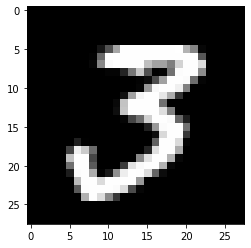

'3'

In [ ]:
i = 417
img = np.array(X_train[i]).reshape(28,28)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
y_train[i]

Let's see how a decision tree with 170 decision rules performs by training it and printing its accuracy

In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 170)	
clf = clf.fit(X_train, y_train)			
correct = 0						
for i in range(len(X_test)):	
  if clf.predict([X_test[i]]) == y_test[i]: correct = correct + 1
  acc = [100.0* correct / len(X_test)]
acc

[79.6]

Now let's try a simple neural network, a multi-layer perceptron with no hidden layers

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=[], max_iter = 10000, activation = 'identity')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.848


Now, we will add one hidden layer and expand the number of hidden units from 10 to 200 in intervals of 10. We'll print the accuracy of each model given the number of hidden units.

In [ ]:
for i in range(1,21):
  nhidden = i*10
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden, score)

10 0.552
20 0.661
30 0.868
40 0.867
50 0.846
60 0.876
70 0.904
80 0.864
90 0.855
100 0.863
110 0.886
120 0.904
130 0.902
140 0.91
150 0.912
160 0.888
170 0.91
180 0.922
190 0.911
200 0.916


To see how a model varies across multiple runes, we check it ten times.

In [ ]:
nhidden = 180
for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden,score)

180 0.893
180 0.912
180 0.926
180 0.909
180 0.905
180 0.92
180 0.923
180 0.894
180 0.896
180 0.915
